In [10]:
import string
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

In [2]:
text=open("input.txt", encoding="utf-8").read()
#print(text)

In [3]:
lower_text=text.lower()
cleaned_text=lower_text.translate(str.maketrans('', '', string.punctuation))
#print(cleaned_text)

In [4]:
tokenize_words=word_tokenize(cleaned_text)

final_words=[]
for word in tokenize_words:
    if word not in stopwords.words("english"):
        final_words.append(word)


In [11]:
emotion_list=[]
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line=line.replace('\n','').replace(',','').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        #print("Word :" + word + "  Emotion :" + emotion)
        if word in final_words:
            emotion_list.append(emotion)
            
print(emotion_list)
Count=Counter(emotion_list)
print(Count)

[' attracted', ' fearful', ' happy', ' powerless', ' happy', ' hated', ' fearless', ' anxious', ' fearful', ' lustful', ' adequate', ' singled out', ' fearful']
Counter({' fearful': 3, ' happy': 2, ' attracted': 1, ' powerless': 1, ' hated': 1, ' fearless': 1, ' anxious': 1, ' lustful': 1, ' adequate': 1, ' singled out': 1})


In [14]:
def sentiment_analyze(sentiment_text):
    score=SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    neg=score['neg']
    pos=score['pos']
    if neg>pos:
        return("Negative Sentiment")
    elif pos>neg:
        return("Positive Sentiment")
    else :
        return("Neutral Condition")
    
    
Sentiment=sentiment_analyze(cleaned_text)

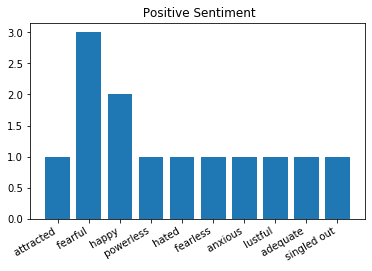

In [15]:
fig, ax1=plt.subplots()
ax1.bar(Count.keys(), Count.values())
fig.autofmt_xdate()
plt.title(" %s" %Sentiment)
plt.savefig('analyser.png')
plt.show()